https://www.kaggle.com/mig555/mushroom-classification
https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison
https://www.kaggle.com/ludobenistant/hr-analytics/kernels?sortBy=hotness&group=everyone&pageSize=20&language=Python&outputType=all&datasetId=358&startRow=0    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('HR_comma_sep.csv')
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [3]:
data.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales salary  
14994                      0  support    low  
14995                      0  support    low  
14996                      0  support    low  
14997                      0  support    low  
14998                      0  support    low

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

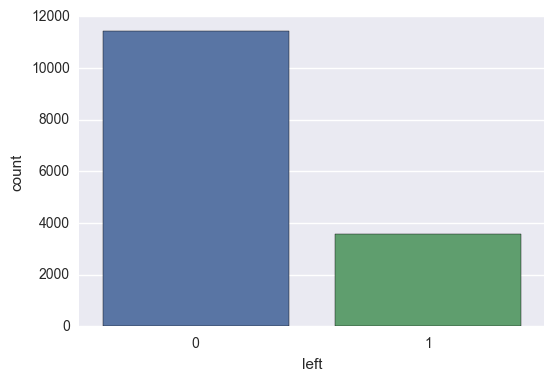

In [7]:
sns.set(style="darkgrid")
sns.countplot(x="left", data=data)

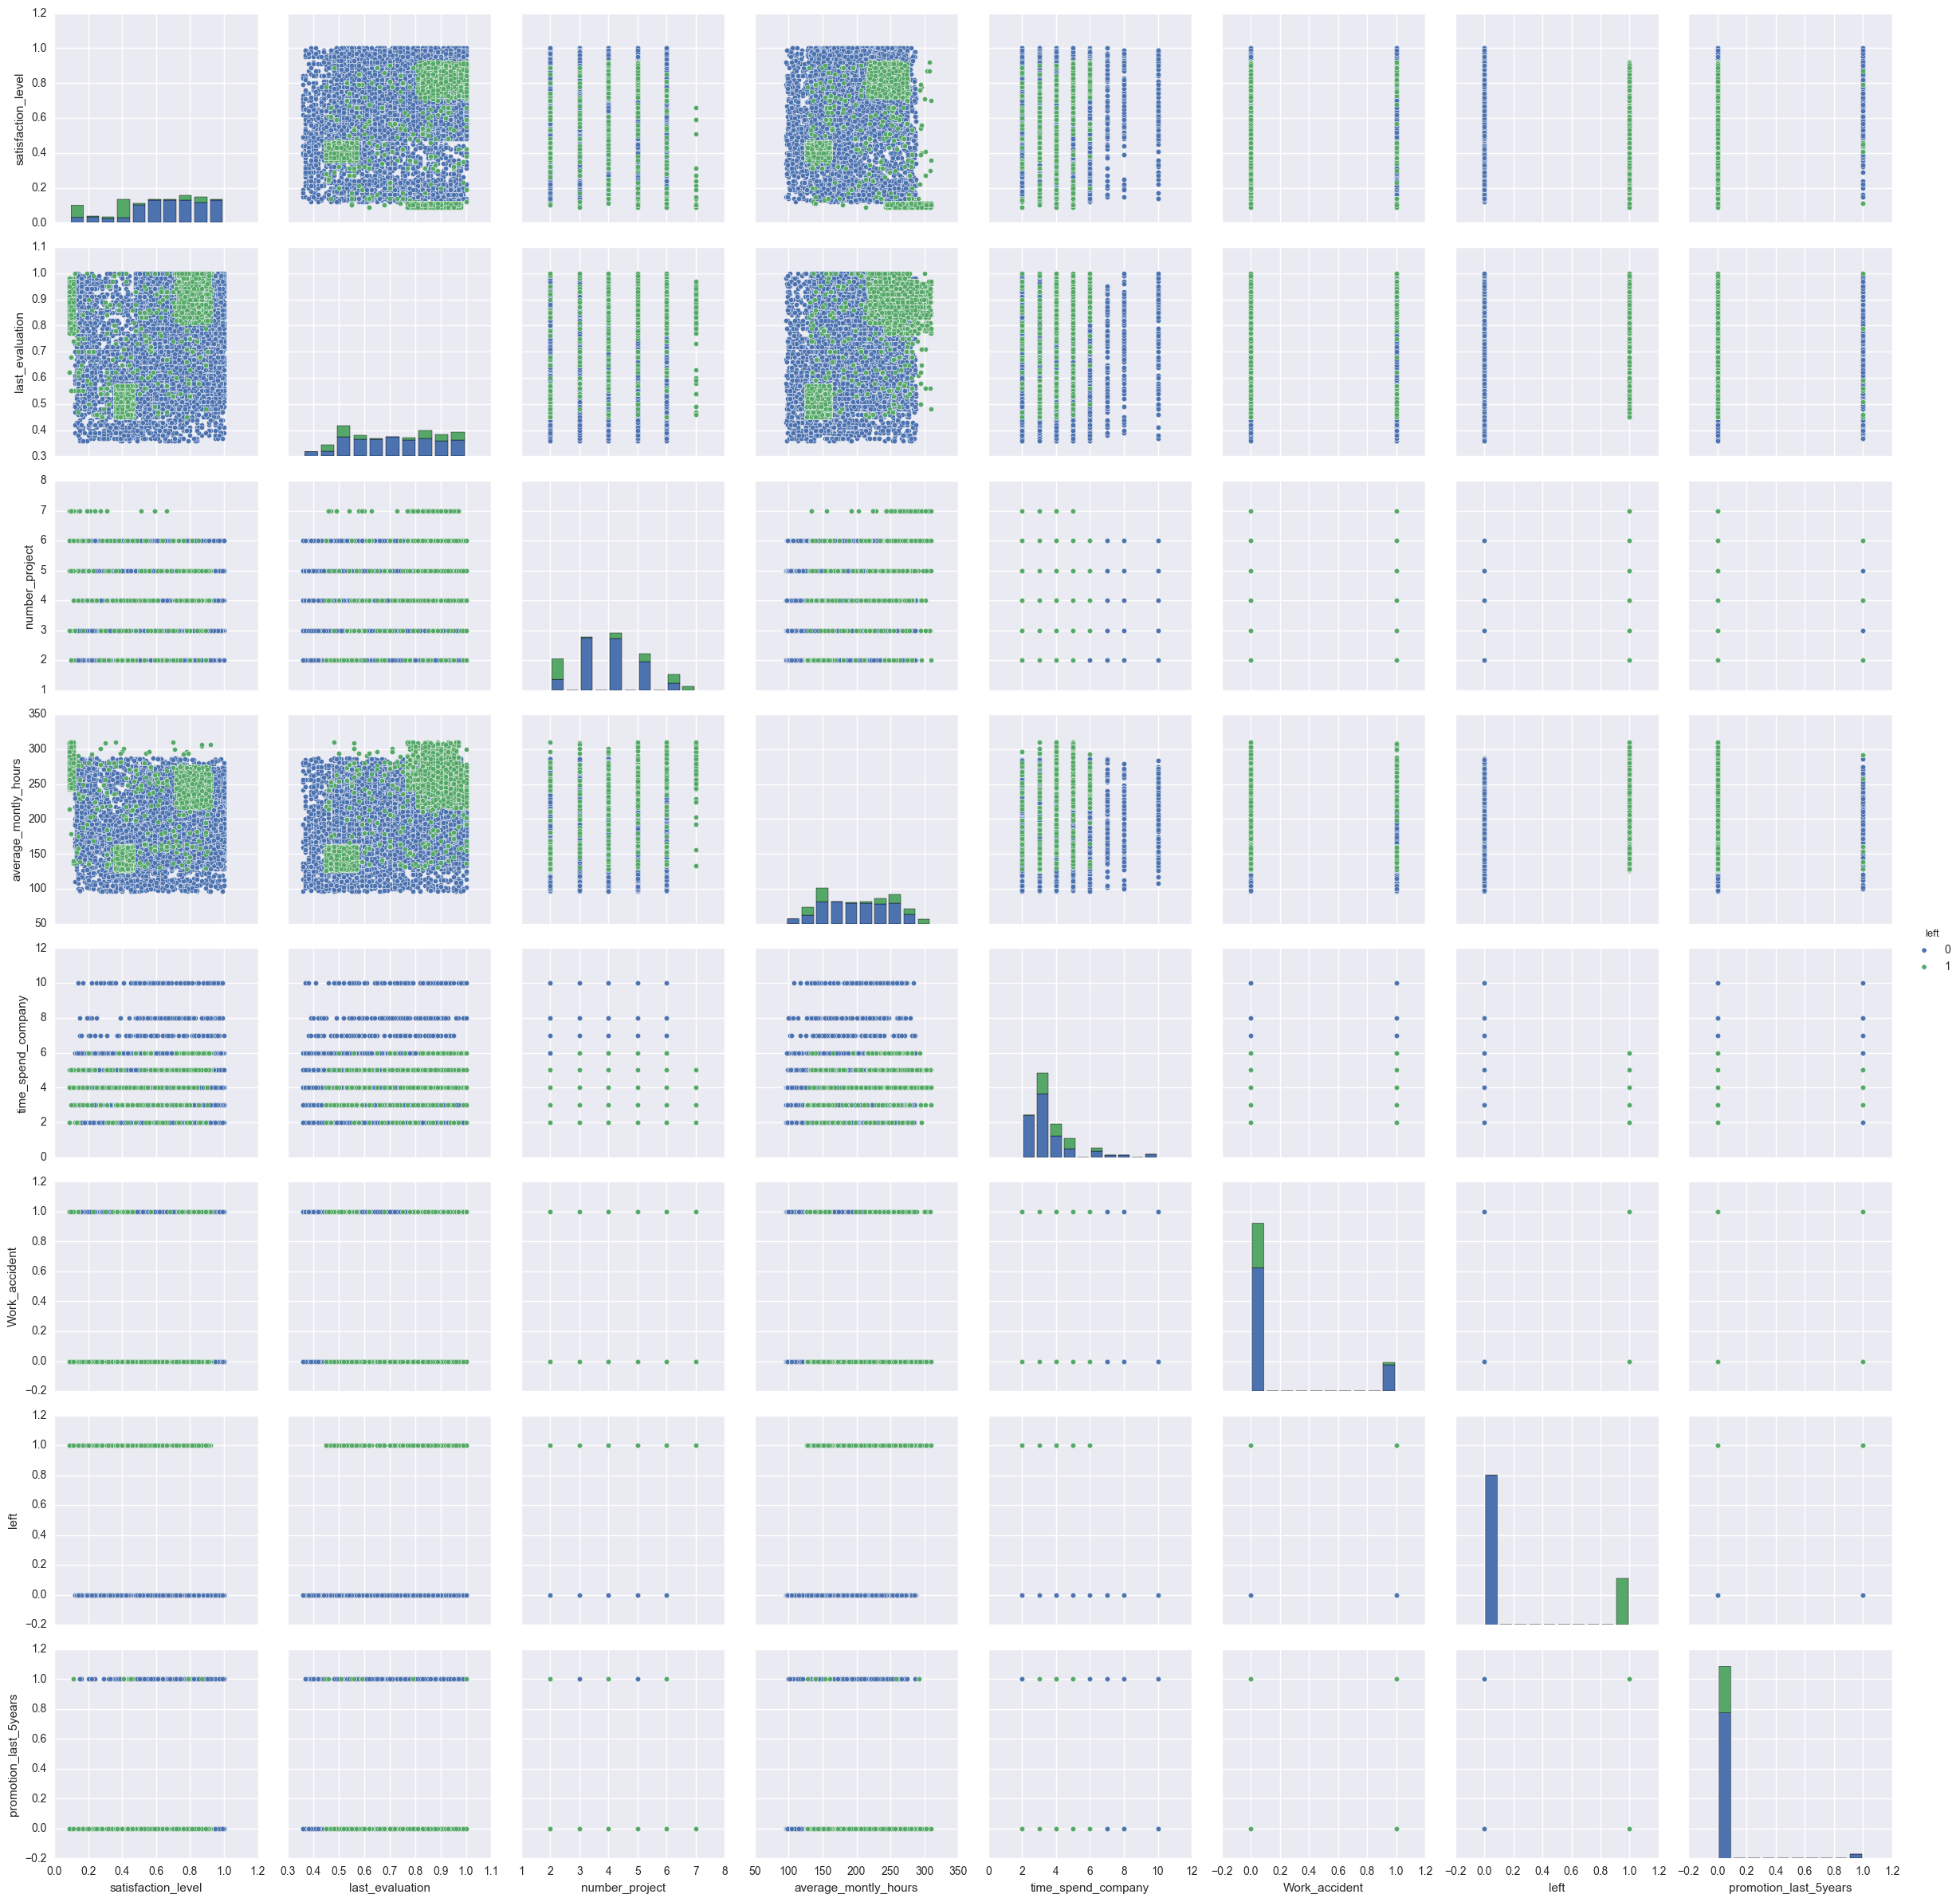

In [8]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
sns.pairplot(data, hue="left", size=3)

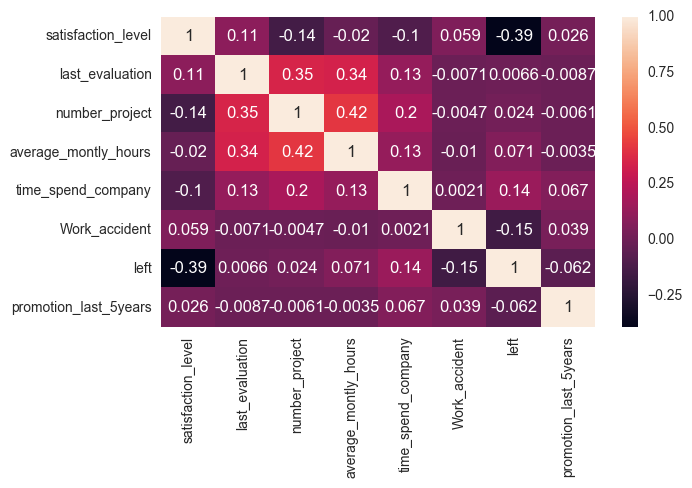

In [9]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [10]:
X=data.drop('left',axis=1)
Y=data['left']

In [11]:
#X_num=data.drop(['left','sales','salary'],axis=1)

In [12]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#cols=list(X_num.columns)
#X_scaled=pd.DataFrame(data=data)
#X_scaled[cols]=scaler.fit_transform(X[cols])
#X_scaled.head()

In [13]:
X_scaled_cat=pd.get_dummies(X)
X_scaled_cat.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  sales_IT  \
0                   3              0                      0       0.0   
1                   6              0                      0       0.0   
2                   4              0                      0       0.0   
3                   5              0                      0       0.0   
4                   3              0                      0       0.0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \
0          0.0               0.0       0.0               0.0              0.0   
1          0.0               0.0       0.0               0.0              0.0   
2          0.0               0.0       0.0               0.0              0.0   
3          0.0               0.0       0.0               0.0              0.0   
4          0.0               0.0       0.0               0.0              0.0   

   sales_product_mng  sales_sales  sales_support  sales_technical  \
0                0.0          1.0            0.0              0.0   
1                0.0          1.0            0.0              0.0   
2                0.0          1.0            0.0              0.0   
3                0.0          1.0            0.0              0.0   
4                0.0          1.0            0.0              0.0   

   salary_high  salary_low  salary_medium  
0          0.0         1.0            0.0  
1          0.0         0.0            1.0  
2          0.0         0.0            1.0  
3          0.0         1.0            0.0  
4          0.0         1.0            0.0

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled_cat,Y,test_size=0.3,random_state=0)

In [15]:

len(Y_train[Y_train==1])/len(Y_train[Y_train==0])

0.31797639969871955

In [23]:

len(Y_test[Y_test==1])/len(Y_test[Y_test==0])

0.29982668977469673

In [24]:
from sklearn.svm import SVC
clf = SVC(random_state=0,class_weight="balanced")
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)

In [25]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

Recall metric in the testing dataset:  0.931599229287


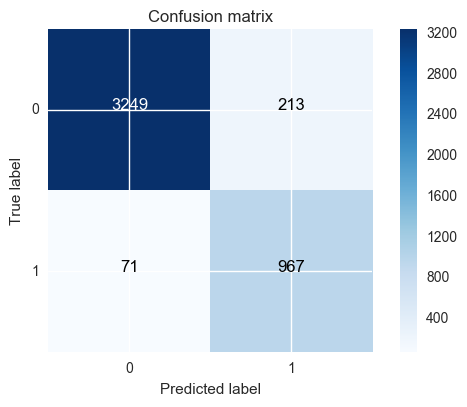

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,predictions)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.935037049652


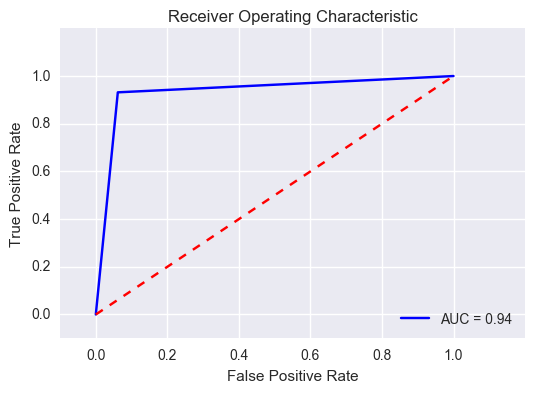

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( class_weight="balanced",random_state=0)
rf.fit(X_train,Y_train)
predictions=rf.predict(X_test)

Recall metric in the testing dataset:  0.952793834297


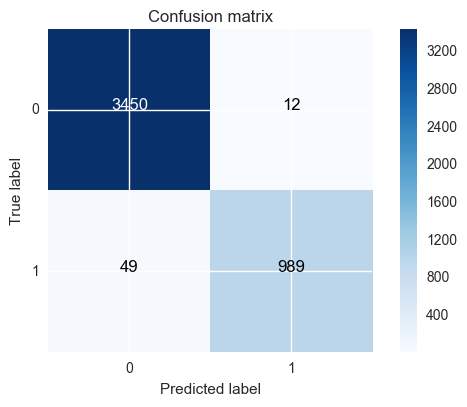

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,predictions)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.974663814895


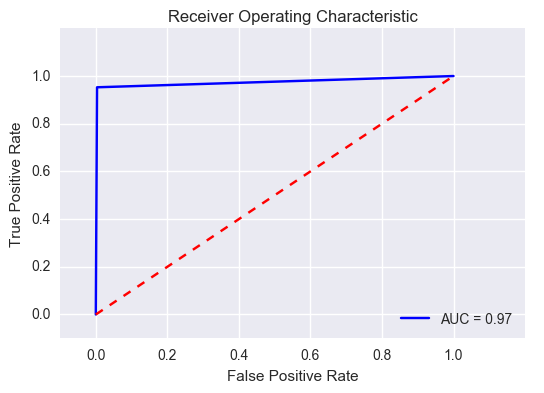

In [33]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [34]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

x_cols=list(X_scaled_cat.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_scaled_cat.shape[1]):
    print("%d. feature %s : %f" % (f + 1, x_cols[f], importances[indices[f]]))

Feature ranking:
1. feature satisfaction_level : 0.292806
2. feature last_evaluation : 0.245059
3. feature number_project : 0.141952
4. feature average_montly_hours : 0.134620
5. feature time_spend_company : 0.130373
6. feature Work_accident : 0.014026
7. feature promotion_last_5years : 0.007136
8. feature sales_IT : 0.005961
9. feature sales_RandD : 0.004153
10. feature sales_accounting : 0.004060
11. feature sales_hr : 0.003534
12. feature sales_management : 0.003234
13. feature sales_marketing : 0.003141
14. feature sales_product_mng : 0.001955
15. feature sales_sales : 0.001551
16. feature sales_support : 0.001490
17. feature sales_technical : 0.001481
18. feature salary_high : 0.001374
19. feature salary_low : 0.001178
20. feature salary_medium : 0.000917


# PCA

In [35]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_std=scl.fit_transform(X_scaled_cat)

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca=PCA()
x_trf=pca.fit_transform(X_std)

In [38]:
var=(pca.explained_variance_)
tot=sum(var)
var_exp = [(i/tot)*100 for i in sorted(var, reverse=True)] # Individual explained variance

In [39]:
exp_var_ratio=pca.explained_variance_ratio_
cum_var=np.cumsum(exp_var_ratio*100)

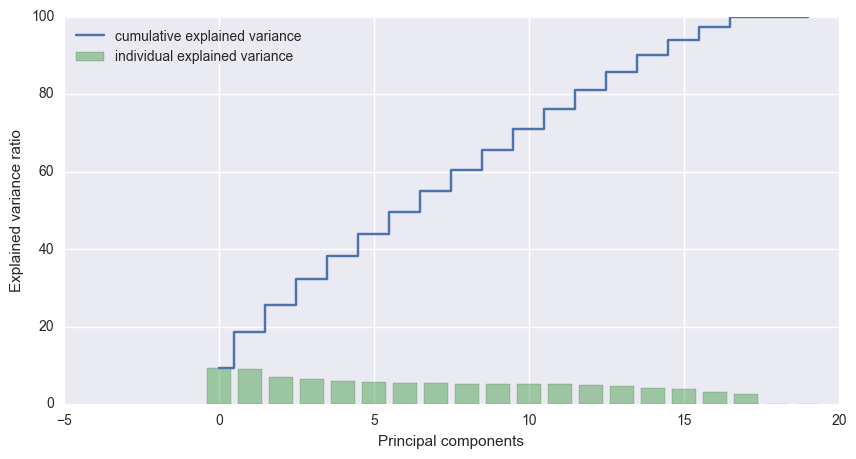

In [41]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(20), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(20), cum_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

**Here we can see 98% of variance is retained in 16 components. So now we can decompose the data into 17 principal components**

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=16)
x_trf_16d=pca.fit_transform(X_std)


In [44]:
data_pca=pd.DataFrame(x_trf_16d,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])

In [45]:
data_pca["Actual Class"]=data["left"]

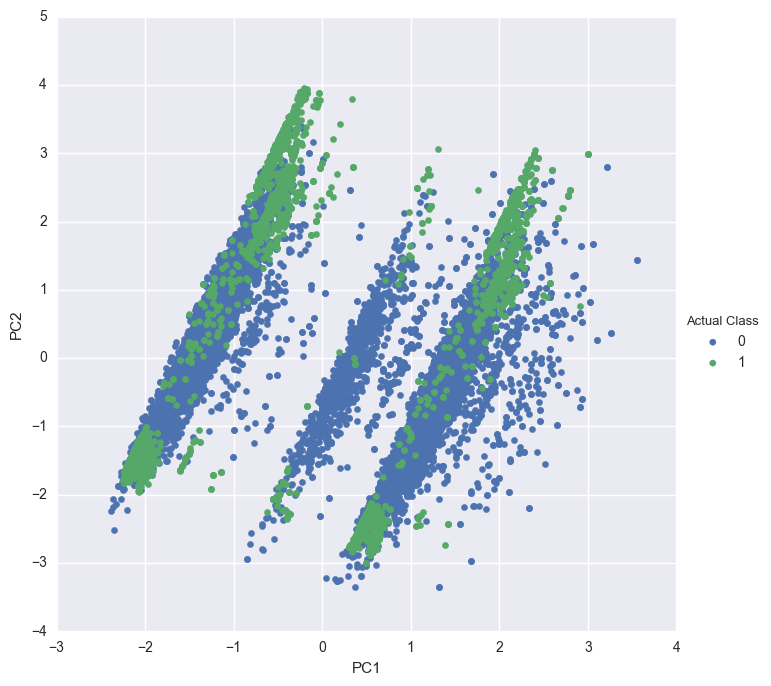

In [46]:
sns.FacetGrid(data_pca, hue="Actual Class", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()